# Plotting lattice quantities
The chip lab uses (used) a 760.6nm blue-detuned lattice for the potassium-40 degenerate Fermi gas.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from amo.lattice import Lattice
from amo.constants import h, mK, hbar

from general.plot_settings import paper_settings
plt.rcParams.update(paper_settings)

## Plot band energies

In [9]:
s = 4  # In recoil energy
Lat = Lattice(s)

print(f"The recoil energy is {Lat.ER/h/1e3:.2f} kHz")

The recoil energy is 8.63 kHz


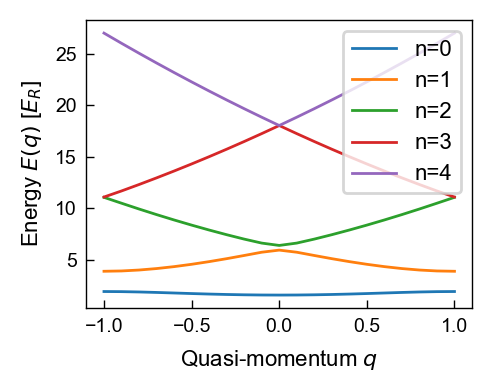

In [12]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Quasi-momentum $q$'
ylabel = r'Energy $E(q)$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

q_max = 1
q_num = 21
q = np.linspace(-q_max, q_max, q_num)

band_structure = np.zeros((Lat.N, q_num), dtype=float)

band_structure = np.array([Lat.calculate_En(qi) for qi in q])
band_structure = band_structure.T

n = 0
while n < 5:
    ax.plot(q, band_structure[n], label=f"n={n}")
    n += 1

ax.legend()

fig.tight_layout()
plt.show()

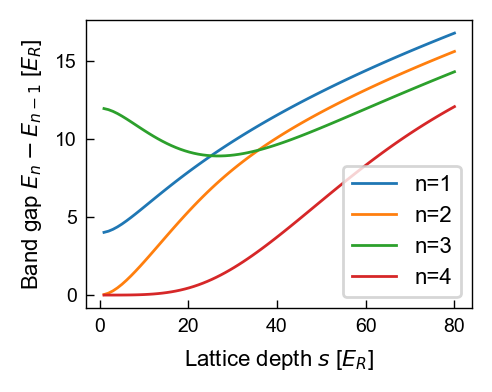

In [18]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'Band gap $E_n - E_{n-1}$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

s_max = 80
depths = np.linspace(1, s_max, s_max-1)

bands = [1, 2, 3, 4]
band_gaps = np.array([[Lattice(s).band_gap(n-1, n) \
                       for s in depths] for n in bands]) 

for n in bands:
    ax.plot(depths, band_gaps[n-1], label=f"n={n}")
ax.legend()

fig.tight_layout()
plt.show()

### Plot E_1 - E_0 compared to E_2 - E_0

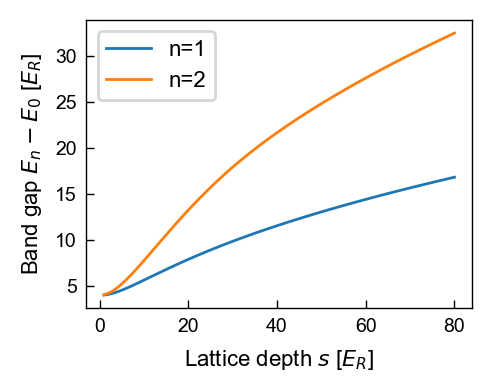

In [15]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'Band gap $E_n - E_0$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

s_max = 80
depths = np.linspace(1, s_max, s_max-1)

bands = [1, 2]
band_gaps = np.array([[Lattice(s).band_gap(0, n) \
                       for s in depths] for n in bands]) 

for n in bands:
    ax.plot(depths, band_gaps[n-1], label=f"n={n}")
ax.legend()

fig.tight_layout()
plt.show()

## Lattice deconfinement
In 2023-02 we measured trap frequencies while LAT 1 and 2 were on, for various lattice light intensities. This ultimately helped us realize LAT2 was not reaching the depth we expected (as it was deconfining more than we expected for the given lattice depth). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from amo.lattice import Lattice
from amo.constants import h, mK, hbar

from general.plot_settings import paper_settings, generate_plt_styles, colors
plt.rcParams.update(paper_settings)
colors = colors[0:]
styles = generate_plt_styles(colors=colors)

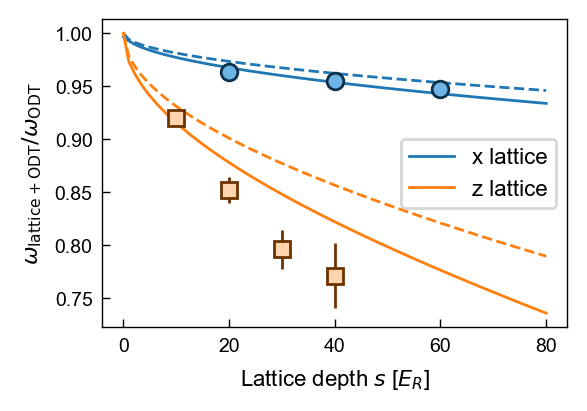

In [2]:
from lattice_deconfinement_calculations import deconfinement_data

# Lattice 1 trap frequency 
wz = 440  # Trap freq with no lattice
lat1_trap_freq_meas = {
        'forward': [np.array([5.41, 11.01, 16.62, 22.22]),
                    np.array([411, 402, 383, 361]),
                    np.array([4, 4, 4, 6])],
        'retro':   [np.array([20, 40, 60]),
                    np.array([424, 420, 417]),
                    np.array([3, 3, 3])]
}

lat1_trap_freq_calc = (deconfinement_data['depths'], 
                       deconfinement_data['LAT1_retro_wz'], 
                       deconfinement_data['LAT1_retro_wz_equal'])


# Lattice 2 trap frequency measurements
wx = 162  # trap freq with no lattice
lat2_trap_freq_meas = {
        'forward': [np.array([0, 2.674, 5.59, 8.51]),
                    np.array([161.2, 159.8, 132.4, 115.9]),
                    np.array([0.5, 0.5, 0.5, 0.5])],
        'retro':   [np.array([40, 20, 10, 30]),
                    np.array([125, 138, 149, 129]),
                    np.array([5, 2, 1, 3])]
}

lat2_trap_freq_calc = (deconfinement_data['depths'], 
                       deconfinement_data['LAT2_retro_wx'], 
                       deconfinement_data['LAT2_retro_wx_equal'])

fig, ax = plt.subplots(figsize=(3,2))

# Retro
# ax = axs[0]
xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'$\omega_\mathrm{lattice + ODT}/\omega_\mathrm{ODT}$'
ax.set(xlabel=xlabel, ylabel=ylabel)

i = 0
sty, color = (styles[i], colors[i])
s, f, ef = lat1_trap_freq_meas['retro']
ax.errorbar(s, f/wz, ef/wz, **sty, label='')
s, f, f_equal = lat1_trap_freq_calc
ax.plot(s, f/wz, color=color, label='x lattice')
ax.plot(s, f_equal/wz, '--', color=color)

i = 1
sty, color = (styles[i], colors[i])
s, f, ef = lat2_trap_freq_meas['retro']
ax.errorbar(s, f/wx, ef/wx, **sty, label='')
s, f, f_equal = lat2_trap_freq_calc
ax.plot(s, f/wx, color=color, label='z lattice')
ax.plot(s, f_equal/wx, '--', color=color)
ax.legend(loc='center right')

# Forward
# ax = axs[1]
# xlabel = r'Lattice depth $s$ [$E_R$]'
# ylabel = r'$\omega_\mathrm{lattice + ODT}/\omega_\mathrm{ODT}$'
# ax.set(xlabel=xlabel, ylabel=ylabel, ylim=[0.6, 1.1], xlim=[-5, 30])

# i = 0
# sty, color = (styles[i], colors[i])
# s, f, ef = lat1_trap_freq_meas['forward']
# ax.errorbar(s, f/wz, ef/wz, **sty, label='')
# s, f = (deconfinement_data['depths'], deconfinement_data['LAT1_forward_wz'])
# ax.plot(s, f/wz, color=color, label='x lattice')

# i = 1
# sty, color = (styles[i], colors[i])
# s, f, ef = lat2_trap_freq_meas['forward']
# ax.errorbar(s, f/wx, ef/wx, **sty, label='')
# s, f = (deconfinement_data['depths'], deconfinement_data['LAT2_forward_wx'])
# ax.plot(s, f/wx, color=color, label='z lattice')
# ax.legend()

plt.show()